## Quick Start

In [4]:
%matplotlib inline 
from pycotools import model, models, viz, tasks, misc
import os
import pandas

/home/b3053674/anaconda2/lib/python2.7/site-packages/pycotools/viz.py:117: FutureWarning: The pandas.parser module is deprecated and will be removed in a future version. Please import from pandas.io.parser instead
  from pandas.parser import CParserError


### Create Michaelis-Menten Model

In [27]:
working_directory = r'/home/b3053674/Documents/Models/2018/01_Jan/PyCoToolsQuickStart'
copasi_file = os.path.join(working_directory, 'quick_start_model.cps')

if os.path.isfile(copasi_file):
    os.remove(copasi_file)

    
kf = 0.01
kb = 0.1
kcat = 0.03
with model.Build(copasi_file) as m:
    m.name = 'Michaelis-Menten'
    
    ## Prespecification of compartment and metabolites is not necessary as defaults are automaticlly created
    ## Here we be explicit to directly specify specie concentrations
    m.add('compartment', name='Cell')
    
    m.add('metabolite', name='P', concentration=0)
    m.add('metabolite', name='S', concentration=50)
    m.add('metabolite', name='E', concentration=15)
    m.add('metabolite', name='ES', concentration=0)
    
    ## type of reaction component are inferred from the expression
    ## For example, here S and E are substrates, ES is product and kf is parameter. 
    ## The reaction has no modifiers. Note, expression has the same syntax as copasi GUI
    m.add('reaction', name='S bind E', 
          expression='S + E -> ES', 
          rate_law='k*S*E',
          parameter_values={'kf': kf})
    
    m.add('reaction', name='S unbind E', 
          expression='ES -> S + E', 
          rate_law='kb*ES',
         parameter_values={'kb': kb})

    m.add('reaction', name='ES produce P', 
          expression='ES -> P',
          rate_law='kcat*ES', 
          parameter_values={'kcat': kcat})
    
michaelis_menten = model.Model(copasi_file)

michaelis_menten

### Simulate Michaelis-Menten model

In [7]:
TC = tasks.TimeCourse(michaelis_menten, end=100, 
                      step_size=0.01, intervals=0.01*100, 
                      report_name='MM-time-course.csv')

### Plot results

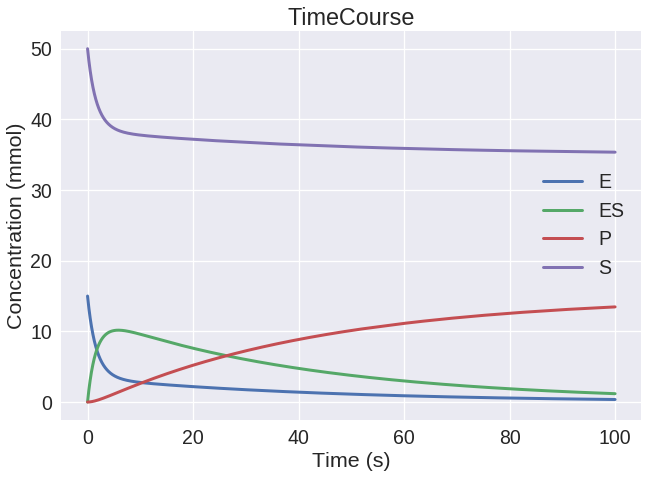

In [8]:
## all on one graph
viz.PlotTimeCourse(TC, separate=False)

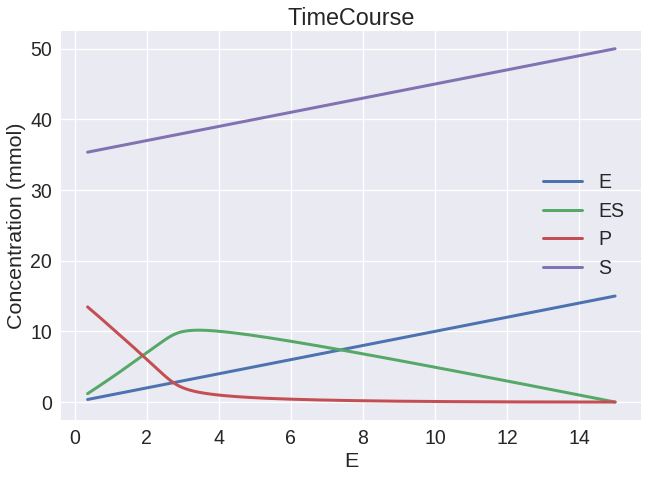

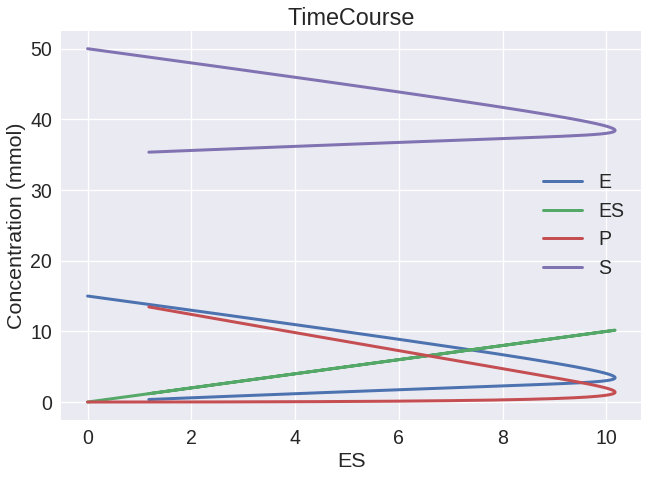

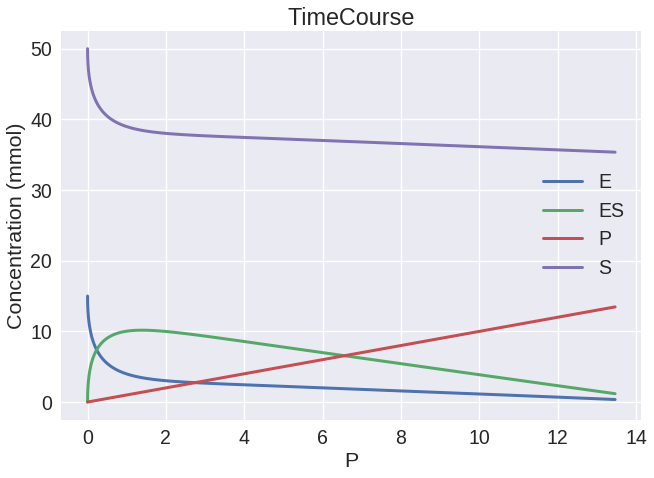

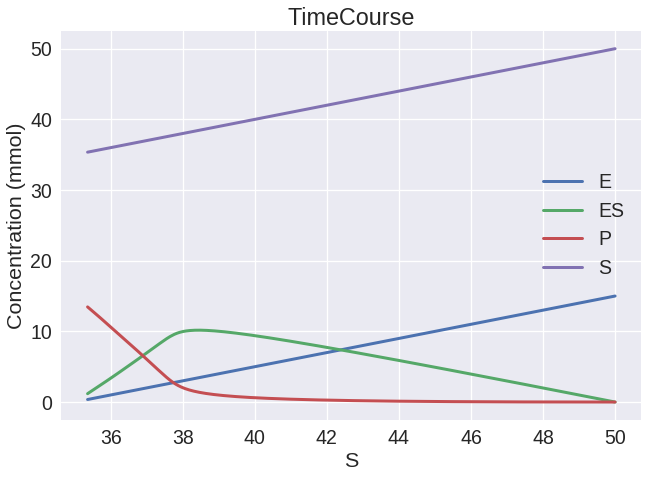

In [9]:
metabolite_names = [i.name for i in michaelis_menten.metabolites]
## plot in phase space by specifying x and y parameters
[viz.PlotTimeCourse(TC, x=i, separate=False) for i in metabolite_names]

### Inspect the model

In [12]:
print('model has {} metabolites, {} reactions and {} local parameters'.format(
    len(michaelis_menten.metabolites),
    len(michaelis_menten.reactions),
    len(michaelis_menten.local_parameters)
)
     )


model has 4 metabolites, 3 reactions and 3 local parameters


### Prepare Time Course Results for Parameter Estimation
Since copasi headers from copasi output looks like this:

In [13]:
pandas.read_csv(TC.report_name, sep='\t').head()  ## i.e. species names are enclosed in '[]'

Time      [E]      [ES]       [P]      [S]
0  0.00  15.0000  0.000000  0.000000  50.0000
1  0.01  14.9253  0.074708  0.000011  49.9253
2  0.02  14.8511  0.148837  0.000045  49.8511
3  0.03  14.7775  0.222392  0.000100  49.7775
4  0.04  14.7044  0.295378  0.000178  49.7044

And we need exact match between variable names and data file headers, we can use the `misc.correct_copasi_timecourse_headers` function to automatically format the simulated time course data for us

In [14]:
misc.correct_copasi_timecourse_headers(TC.report_name)

Time          E        ES          P        S
0        0.00  15.000000  0.000000   0.000000  50.0000
1        0.01  14.925300  0.074708   0.000011  49.9253
2        0.02  14.851100  0.148837   0.000045  49.8511
3        0.03  14.777500  0.222392   0.000100  49.7775
4        0.04  14.704400  0.295378   0.000178  49.7044
5        0.05  14.631900  0.367801   0.000278  49.6319
6        0.06  14.559900  0.439666   0.000399  49.5599
7        0.07  14.488500  0.510978   0.000541  49.4885
8        0.08  14.417600  0.581742   0.000705  49.4176
9        0.09  14.347100  0.651963   0.000890  49.3471
10       0.10  14.277300  0.721646   0.001096  49.2773
11       0.11  14.207900  0.790797   0.001323  49.2079
12       0.12  14.139000  0.859420   0.001571  49.1390
13       0.13  14.070600  0.927520   0.001839  49.0706
14       0.14  14.002800  0.995101   0.002127  49.0028
15       0.15  13.935400  1.062170   0.002436  48.9354
16       0.16  13.868500  1.128730   0.002765  48.8685
17       0.17  13.802100  1.194780   0.003113  48.8021
18       0.18  13.736200  1.260340   0.003481  48.7362
19       0.19  13.670700  1.325400   0.003869  48.6707
20       0.20  13.605800  1.389970   0.004277  48.6058
21       0.21  13.541200  1.454050   0.004703  48.5412
22       0.22  13.477200  1.517650   0.005149  48.4772
23       0.23  13.413600  1.580770   0.005614  48.4136
24       0.24  13.350500  1.643420   0.006097  48.3505
25       0.25  13.287800  1.705600   0.006600  48.2878
26       0.26  13.225600  1.767310   0.007121  48.2256
27       0.27  13.163800  1.828570   0.007660  48.1638
28       0.28  13.102400  1.889360   0.008218  48.1024
29       0.29  13.041500  1.949710   0.008794  48.0415
...       ...        ...       ...        ...      ...
9971    99.71   0.359343  1.188550  13.452100  35.3593
9972    99.72   0.359261  1.188270  13.452500  35.3593
9973    99.73   0.359179  1.188000  13.452800  35.3592
9974    99.74   0.359097  1.187720  13.453200  35.3591
9975    99.75   0.359015  1.187450  13.453500  35.3590
9976    99.76   0.358933  1.187170  13.453900  35.3589
9977    99.77   0.358851  1.186900  13.454200  35.3589
9978    99.78   0.358769  1.186630  13.454600  35.3588
9979    99.79   0.358687  1.186350  13.455000  35.3587
9980    99.80   0.358605  1.186080  13.455300  35.3586
9981    99.81   0.358523  1.185800  13.455700  35.3585
9982    99.82   0.358441  1.185530  13.456000  35.3584
9983    99.83   0.358359  1.185260  13.456400  35.3584
9984    99.84   0.358278  1.184980  13.456700  35.3583
9985    99.85   0.358196  1.184710  13.457100  35.3582
9986    99.86   0.358114  1.184440  13.457500  35.3581
9987    99.87   0.358032  1.184160  13.457800  35.3580
9988    99.88   0.357950  1.183890  13.458200  35.3580
9989    99.89   0.357869  1.183620  13.458500  35.3579
9990    99.90   0.357787  1.183340  13.458900  35.3578
9991    99.91   0.357705  1.183070  13.459200  35.3577
9992    99.92   0.357624  1.182800  13.459600  35.3576
9993    99.93   0.357542  1.182520  13.459900  35.3575
9994    99.94   0.357460  1.182250  13.460300  35.3575
9995    99.95   0.357379  1.181980  13.460600  35.3574
9996    99.96   0.357297  1.181700  13.461000  35.3573
9997    99.97   0.357215  1.181430  13.461400  35.3572
9998    99.98   0.357134  1.181160  13.461700  35.3571
9999    99.99   0.357052  1.180890  13.462100  35.3571
10000  100.00   0.356971  1.180610  13.462400  35.3570

[10001 rows x 5 columns]

### Do parameter estimations
Spread computation over multiple model copies. Use an appropriate `copy_number` for your computers capabilities. Monitor task manager or system monitor to see CopasiSE tasks in operation.

In [15]:
PE = tasks.MultiParameterEstimation(michaelis_menten, TC.report_name, method='genetic_algorithm_sr', 
                                   copy_number=3, pe_number=20, population_size=50, 
                                   number_of_generations=100, metabolites=[], overwrite_config_file=True)
PE.write_config_file()
PE.setup()
PE.run()

print('PE results will go to {}'.format(PE.results_directory))

pycotools.tasks:DEBUG:602:    running Model(name=Michaelis-Menten, time_unit=s, volume_unit=ml, quantity_unit=mmol)
pycotools.tasks:DEBUG:602:    running Model(name=Michaelis-Menten, time_unit=s, volume_unit=ml, quantity_unit=mmol)
pycotools.tasks:DEBUG:602:    running Model(name=Michaelis-Menten, time_unit=s, volume_unit=ml, quantity_unit=mmol)
PE results will go to /home/b3053674/Documents/Models/2018/01_Jan/PyCoToolsQuickStart/MultipleParameterEstimationResults


### Visualize data

/home/b3053674/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


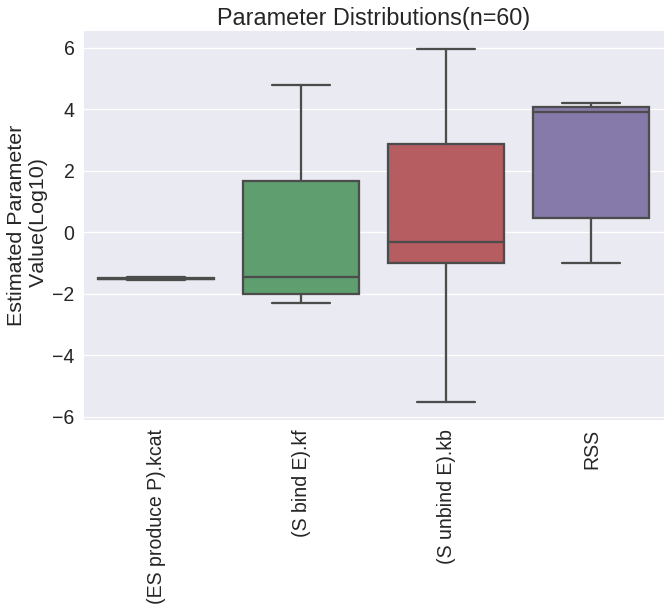

In [16]:
## boxplot all data
viz.Boxplots(PE, log10=True, num_per_plot=8)

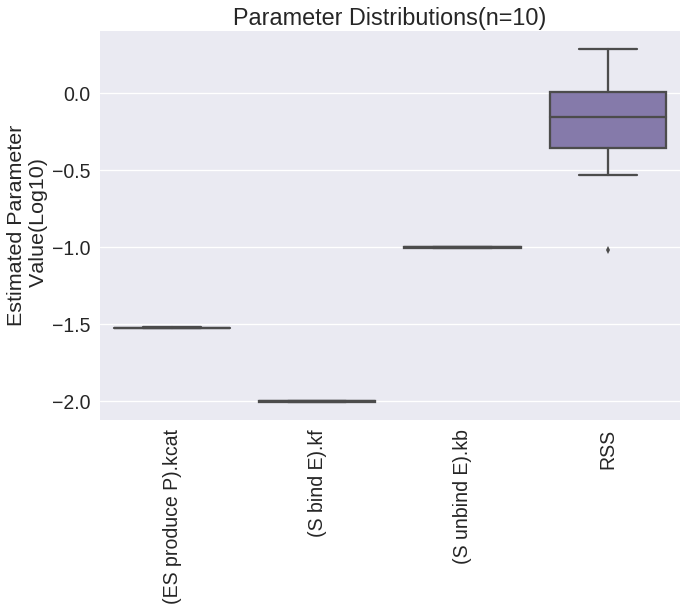

In [17]:
## box plot top 10 results
viz.Boxplots(PE, log10=True, num_per_plot=8, truncate_mode='ranks', theta=range(10))

/home/b3053674/anaconda2/lib/python2.7/site-packages/pycotools/viz.py:2080: RuntimeWarning: divide by zero encountered in log10
  x = numpy.log10(range(self.data['RSS'].shape[0]))


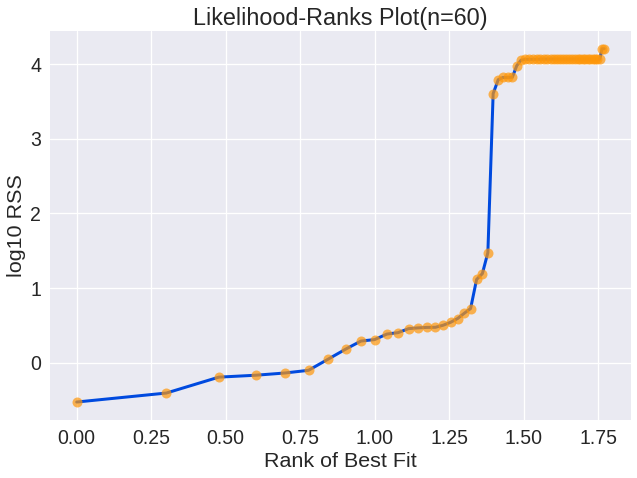

In [18]:
## Evaluate performance of optimization problem with likelihood-ranks plot
viz.LikelihoodRanks(PE, log10=True)

pycotools.viz:DEBUG:1390:    tpe self.cls parse --> MultiParameterEstimation(copy_number="3", pe_number="20", method="genetic_algorithm_sr")
pycotools.viz:INFO:1517:    Plotting "E"
pycotools.viz:INFO:1517:    Plotting "ES"
pycotools.viz:INFO:1517:    Plotting "P"
pycotools.viz:INFO:1517:    Plotting "S"


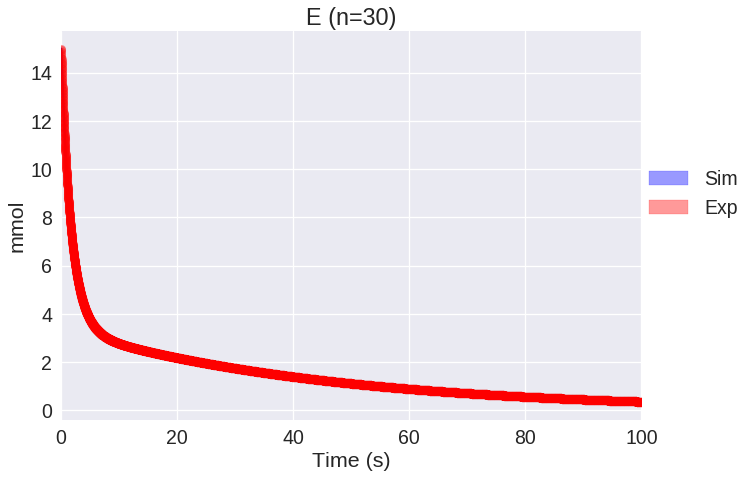

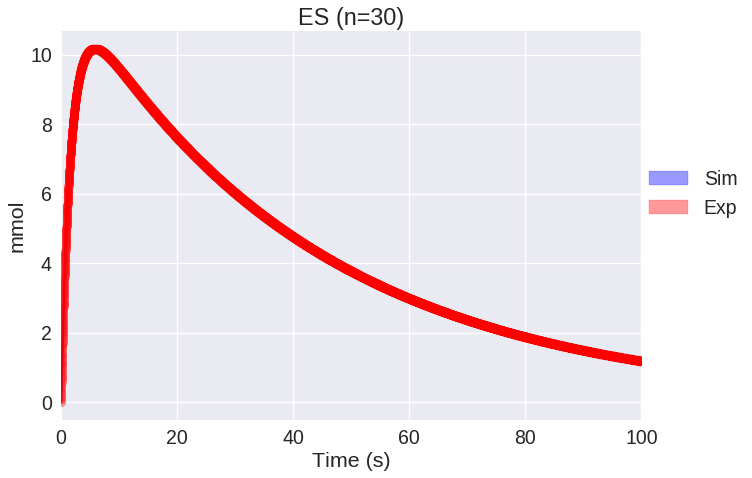

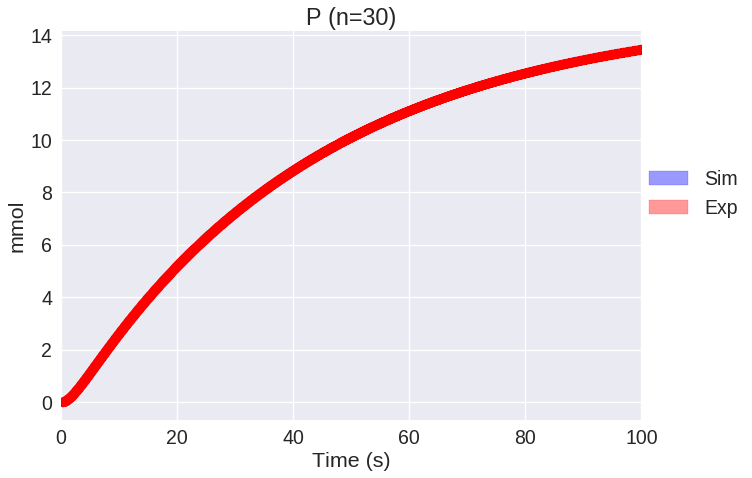

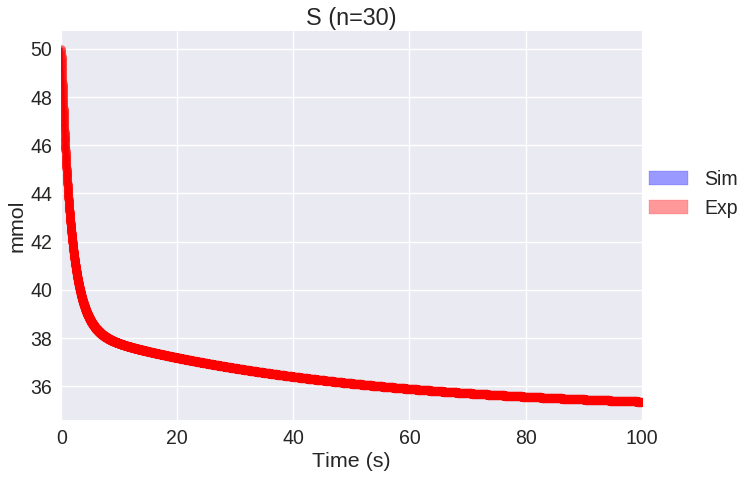

In [19]:
## visualize uncertainty in model predictions introduced by parameter sets
viz.PlotTimeCourseEnsemble(PE, truncate_mode='ranks', theta=range(30))

pycotools.viz:INFO:2404:    Plotting "(ES produce P).kcat" Vs "(ES produce P).kcat"
pycotools.viz:INFO:2404:    Plotting "(ES produce P).kcat" Vs "(S bind E).kf"
pycotools.viz:INFO:2404:    Plotting "(ES produce P).kcat" Vs "(S unbind E).kb"
pycotools.viz:INFO:2404:    Plotting "(ES produce P).kcat" Vs "RSS"
pycotools.viz:INFO:2404:    Plotting "(S bind E).kf" Vs "(ES produce P).kcat"
pycotools.viz:INFO:2404:    Plotting "(S bind E).kf" Vs "(S bind E).kf"
pycotools.viz:INFO:2404:    Plotting "(S bind E).kf" Vs "(S unbind E).kb"
pycotools.viz:INFO:2404:    Plotting "(S bind E).kf" Vs "RSS"
pycotools.viz:INFO:2404:    Plotting "(S unbind E).kb" Vs "(ES produce P).kcat"
pycotools.viz:INFO:2404:    Plotting "(S unbind E).kb" Vs "(S bind E).kf"
pycotools.viz:INFO:2404:    Plotting "(S unbind E).kb" Vs "(S unbind E).kb"
pycotools.viz:INFO:2404:    Plotting "(S unbind E).kb" Vs "RSS"
pycotools.viz:INFO:2404:    Plotting "RSS" Vs "(ES produce P).kcat"
pycotools.viz:INFO:2404:    Plotting "RSS"

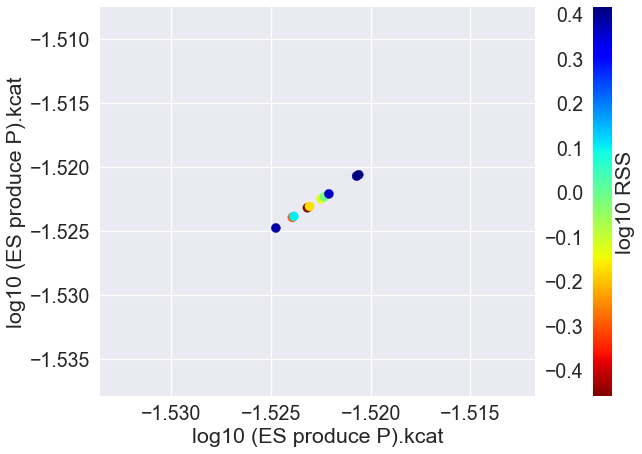

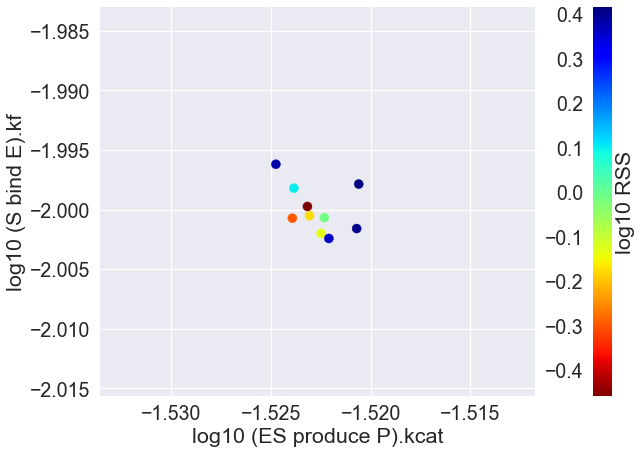

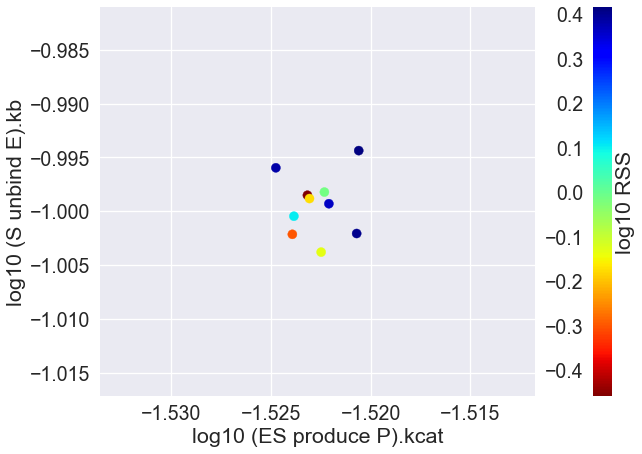

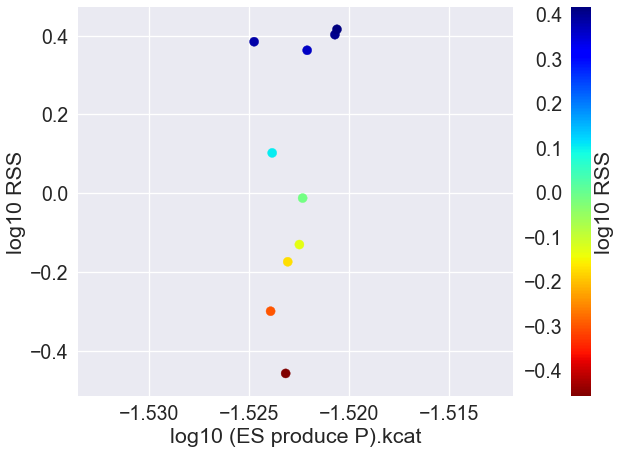

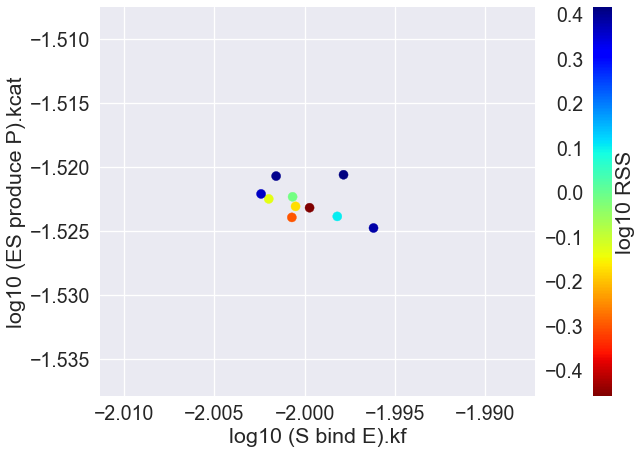

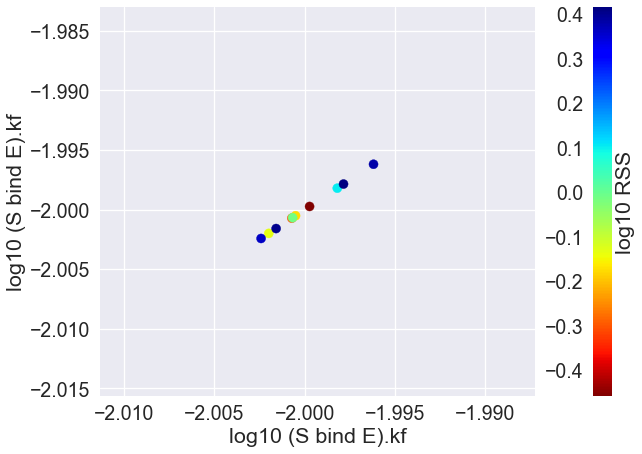

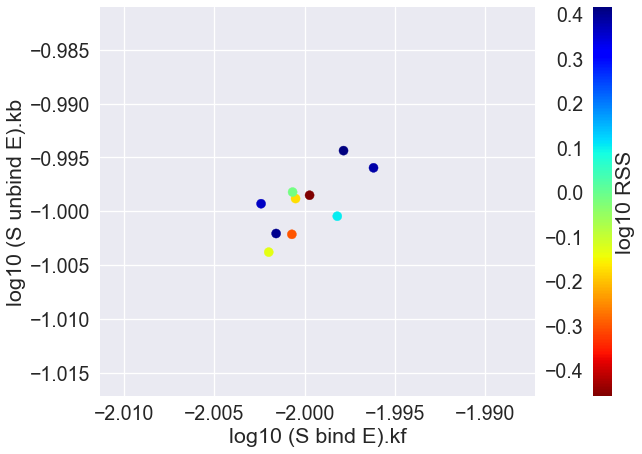

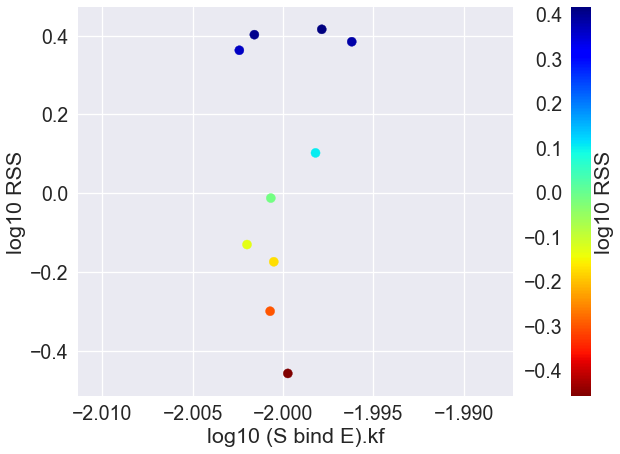

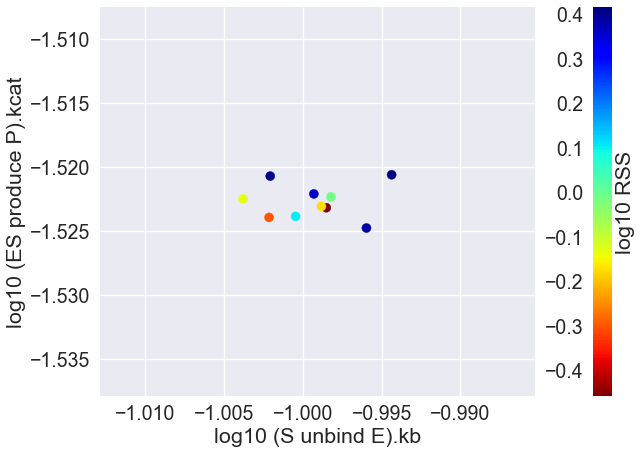

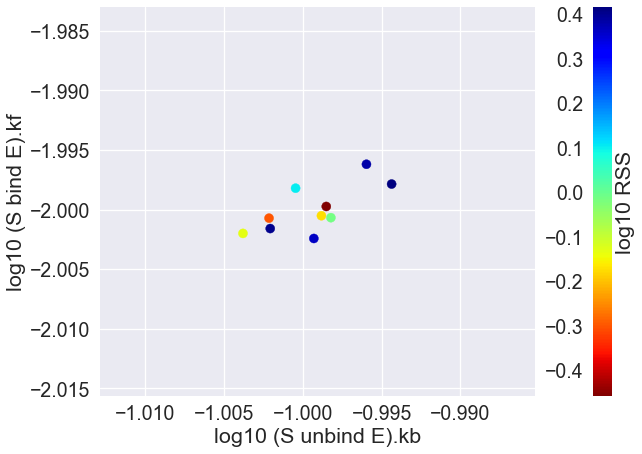

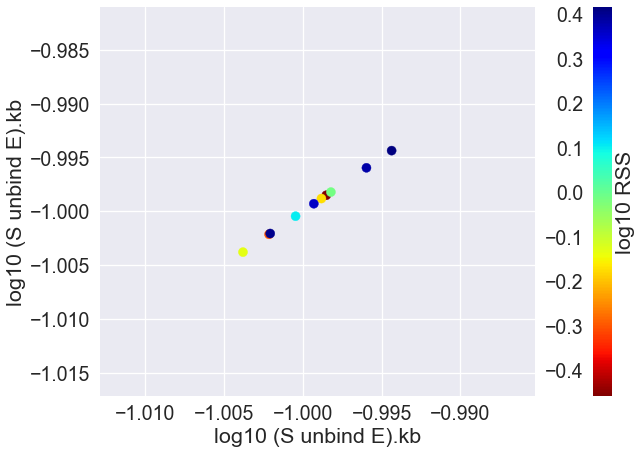

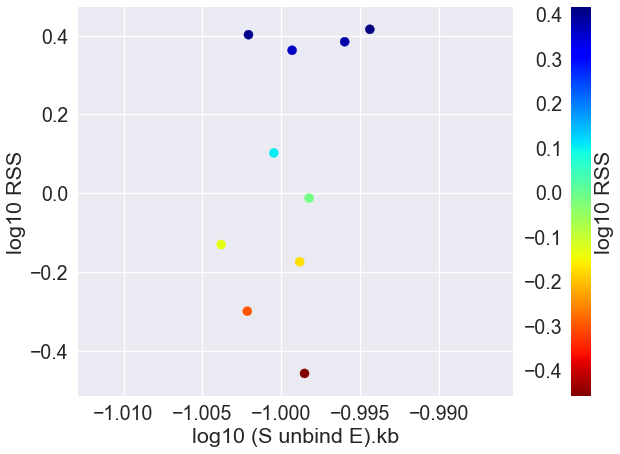

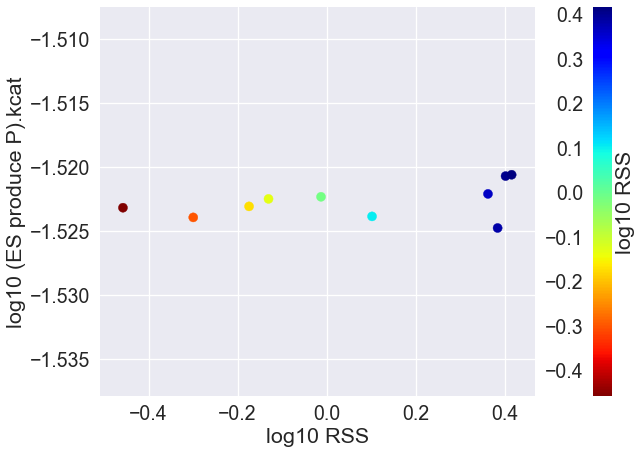

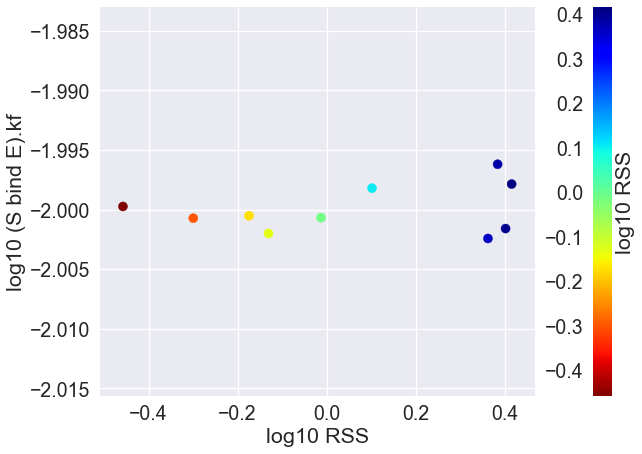

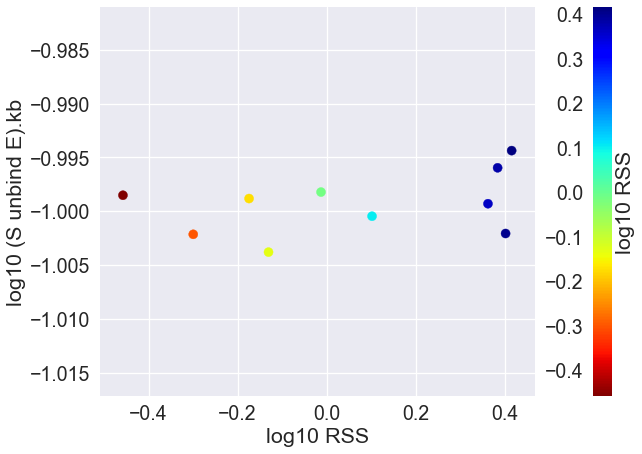

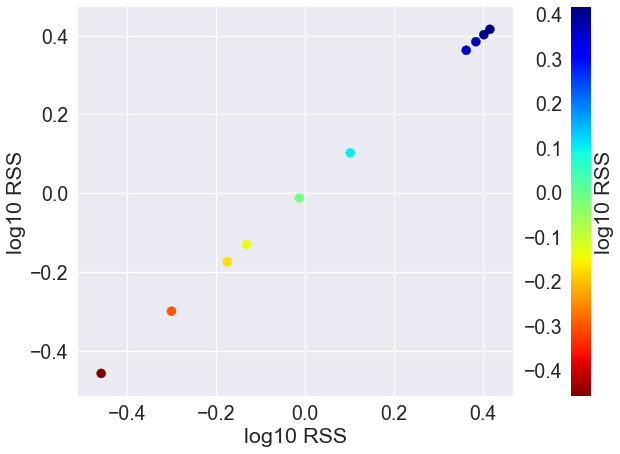

In [51]:
## Plot all combinations of parameter
viz.Scatters(PE, x='all', y='all', log10=True, truncate_mode='ranks', theta=range(10))

### Profile Likelihoods

In [20]:
PL = tasks.ProfileLikelihood(michaelis_menten, parameter_path=PE.results_directory, index=0, run=True,
                            max_active=4, number_of_steps=10, log10=True)

print(PL.results_directory)

pycotools.tasks:INFO:4866:    running /home/b3053674/Documents/Models/2018/01_Jan/PyCoToolsQuickStart/ProfileLikelihoods/0/(S bind E).kf.cps
pycotools.tasks:INFO:4866:    running /home/b3053674/Documents/Models/2018/01_Jan/PyCoToolsQuickStart/ProfileLikelihoods/0/(ES produce P).kcat.cps
pycotools.tasks:INFO:4866:    running /home/b3053674/Documents/Models/2018/01_Jan/PyCoToolsQuickStart/ProfileLikelihoods/0/(S unbind E).kb.cps
/home/b3053674/Documents/Models/2018/01_Jan/PyCoToolsQuickStart/ProfileLikelihoods


/home/b3053674/anaconda2/lib/python2.7/site-packages/pycotools/viz.py:3515: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_data = self.data.loc[x, i][y]


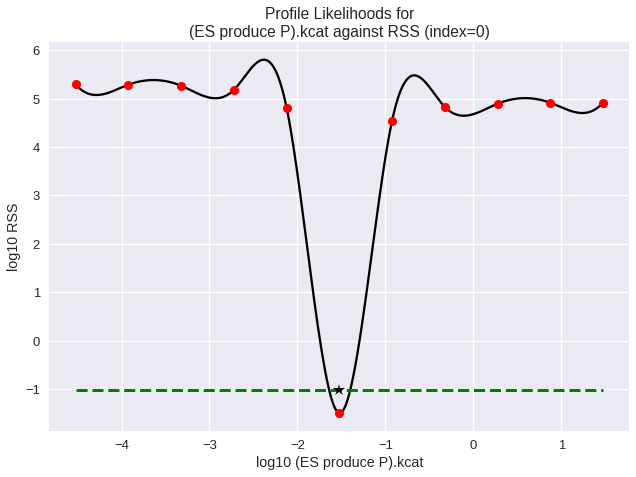

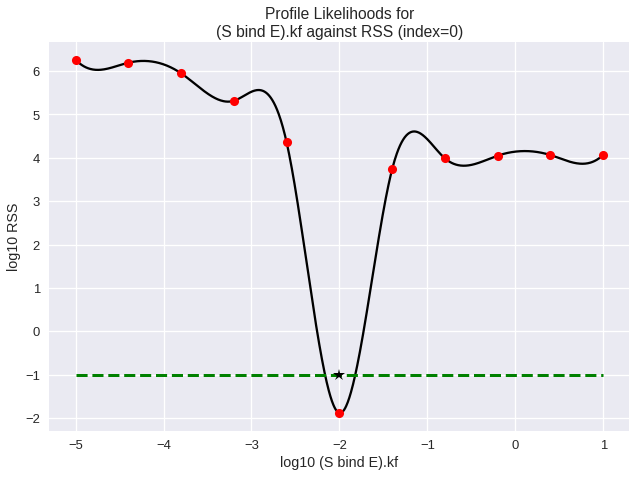

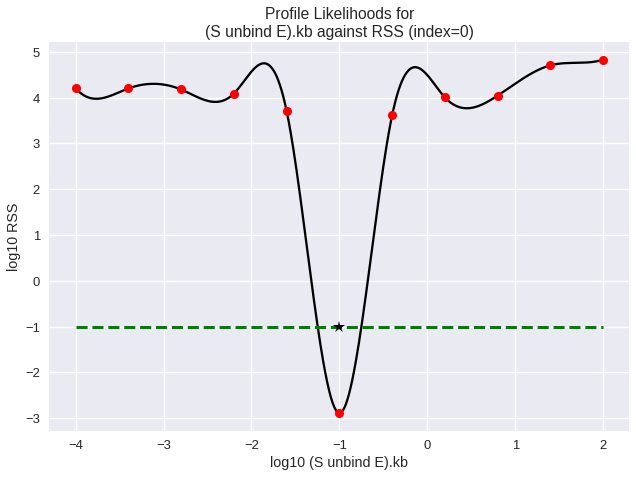

In [22]:
viz.PlotProfileLikelihood(PL, interpolation='cubic', log10=True, show_best_rss=True)

### Best Parameters
original parameters:
* kf: 0.01
* kb: 0.1
* kcat: 0.03

Best estimated parameters:

In [80]:
viz.Parse(PE).data.iloc[0]

(ES produce P).kcat    0.029980
(S bind E).kf          0.010006
(S unbind E).kb        0.100343
RSS                    0.348595
Name: 0, dtype: float64